<a href="https://colab.research.google.com/github/sophspilio/-geo-pandas_tutorial/blob/main/gpd_polygon_clip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A (very brief) Geopandas Tutorial! 
[with help from geopandas.org](https://geopandas.org/gallery/plot_clip.html)

created by Sophie Spiliotopoulos

In [44]:
#set up google drive as data source 
from google.colab import drive 
drive.mount('/content/gdrive') 
root_path = 'gdrive/My Drive/(geo)pandas_tutorial_final/' # set root path

Mounted at /content/gdrive


In [ ]:
#install anything and everything 
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.geometry import Polygon, LineString
!apt install libspatialindex-dev
!pip install rtree
import rtree

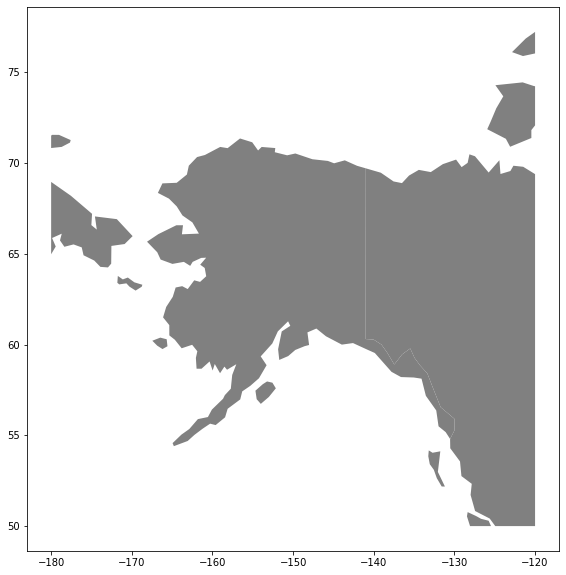

In [43]:
#get world layer 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#create polygon to clip to 
poly = Polygon([(-180, 50), (-180, 80), (-120, 80), (-120, 50)])
polygon = gpd.GeoDataFrame([1], geometry=[poly], crs=world.crs)
#clip world to polygon 
clipped = gpd.clip(world, polygon)
fig, ax = plt.subplots(figsize=(12,10))
clipped.plot(ax=ax, color='gray')

In [50]:
#import polygon data as alaska state plane and point data 
dbo = gpd.read_file(root_path+'DBOsites_erased_land.shp', crs = {'init' :'epsg:3413'})
dbopoint = gpd.read_file(root_path+'dbo1_8_projet.shp', crs = {'init' :'epsg:3476'})
dbopoint = dbopoint.to_crs('epsg:4326')
dbo = dbo.to_crs('epsg:4326')

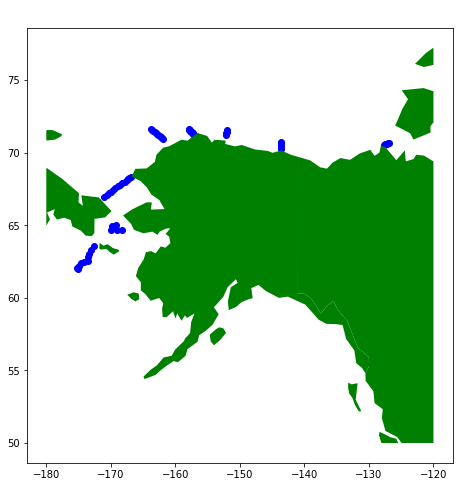

In [67]:
#make the plot
fig, ax = plt.subplots(figsize=(12, 8))
dbopoint.plot(ax=ax, color="blue")
clipped.plot(ax=ax, color="green")
ax.set_title("DBO Stations", fontsize=20,color = 'white')
ax.set_axis_on()
plt.show()

In [ ]:
#for a simpler map
base=clipped.plot(color='gray')
dbopoint.plot(ax=base,color='red')

In [ ]:
base=clipped.plot(color='gray')
dbo.plot(ax=base,color='cyan')